In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import numpy as np
import seaborn as sns

In [172]:
df1 = pd.read_csv('../data/books_25_pages_author_info_description_genres_topics.csv',skipinitialspace=True)
df1 = df1.rename(columns = lambda x: x.strip())
value_author_num_unique_books = df1['author_num_unique_books'].values
df1 = df1.drop('author_num_unique_books',axis=1)
df1.insert(loc=8,column='author_num_unique_books',value=value_author_num_unique_books)
df1.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,author_num_unique_books,kindle_price,...,topic 10,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,36.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,396.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,505.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,7.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,18.0,9.99,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
#[print(i) for i in df1.columns]

In [174]:
#drop unimportant columns
# df2 = df1.drop(columns=['book_description','title_description_genres','author_num_unique_books','avg_rating','num_ratings','kindle_price','book_reference','author_names','author_link','book_isbn'])
df2 = df1.drop(columns=['book_description','title_description_genres','num_ratings','kindle_price','book_reference','author_names','author_link','book_isbn'])

df2.head()

,avg_rating,year_published,book_title,book_review_count,author_num_unique_books,genre_abuse,genre_adult,genre_adult-fiction,genre_adventure,genre_african-american,...,topic 10,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19
0,3.94,2016.0,The Subtle Art of Not Giving a F*ck,33082.0,36.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.20,1936.0,How to Win Friends and Influence People,15121.0,396.0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.12,1989.0,The 7 Habits of Highly Effective People,10277.0,505.0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.10,2012.0,The Power of Habit,16950.0,7.0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.84,2011.0,The Life-Changing Magic of Tidying Up,27998.0,18.0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
# check NaN values
print(len(df2.index))
df2.loc[:,['year_published','book_review_count','book_title','author_num_unique_books','avg_rating']].stb.missing()

1214


,missing,total,percent
author_num_unique_books,21,1214,1.729819
year_published,13,1214,1.070840
book_review_count,0,1214,0.000000
book_title,0,1214,0.000000
avg_rating,0,1214,0.000000


In [176]:
# drop rows where kindle_price or book_review_count or year_pubished are NaN because they are important values
df3 = df2.dropna()
len(df3.index)

1151

In [177]:
# create column for normalized num_ratings and review_count by years since published
# use only books from previous 2019 or older
df4 = df3[(df3['year_published']<2020)] #&(df_percent_genre['year_published']>2000)]
df5 = df4.copy()
df5['reviews_per_month'] = df4.apply(lambda x : x['book_review_count']/(12*(2020-x['year_published'])),axis=1)
df5.head()

,avg_rating,year_published,book_title,book_review_count,author_num_unique_books,genre_abuse,genre_adult,genre_adult-fiction,genre_adventure,genre_african-american,...,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19,reviews_per_month
0,3.94,2016.0,The Subtle Art of Not Giving a F*ck,33082.0,36.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,689.208333
1,4.20,1936.0,How to Win Friends and Influence People,15121.0,396.0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000992
2,4.12,1989.0,The 7 Habits of Highly Effective People,10277.0,505.0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.626344
3,4.10,2012.0,The Power of Habit,16950.0,7.0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,176.562500
4,3.84,2011.0,The Life-Changing Magic of Tidying Up,27998.0,18.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,259.240741


count    1143.000000
mean       29.718354
std       127.126451
min         0.019492
25%         1.725122
50%         5.212963
75%        16.111111
max      2816.875000
Name: reviews_per_month, dtype: float64

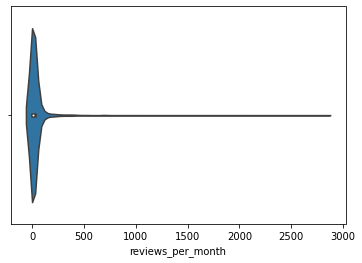

In [178]:
sns.violinplot(x=df5["reviews_per_month"])
df5['reviews_per_month'].describe()

In [179]:
df6 = df5[df5['reviews_per_month']<100]
len(df6.index)

1080

count    1080.000000
mean       11.575414
std        17.305403
min         0.019492
25%         1.608817
50%         4.734788
75%        12.953993
max        99.916667
Name: reviews_per_month, dtype: float64

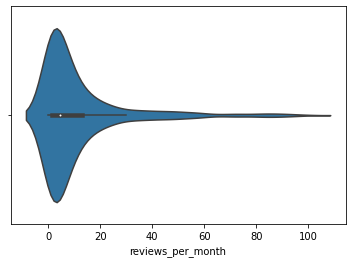

In [180]:
sns.violinplot(x=df6["reviews_per_month"])
df6['reviews_per_month'].describe()

count    1080.000000
mean     1989.565741
std       162.191729
min      -600.000000
25%      1998.000000
50%      2008.000000
75%      2014.000000
max      2019.000000
Name: year_published, dtype: float64

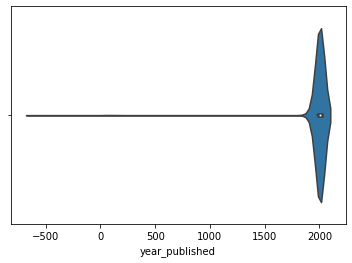

In [181]:
sns.violinplot(x=df6["year_published"])
df6['year_published'].describe()

In [182]:
df7 = df6[df6['year_published']>1900]
len(df7.index)

1067

count    1067.000000
mean     2003.134021
std        17.076855
min      1902.000000
25%      1998.000000
50%      2008.000000
75%      2014.000000
max      2019.000000
Name: year_published, dtype: float64

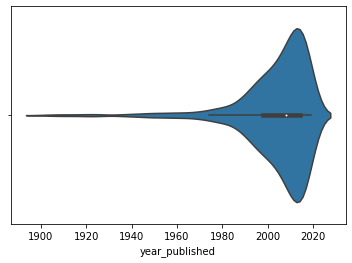

In [183]:
sns.violinplot(x=df7["year_published"])
df7['year_published'].describe()

In [184]:
df8 = df7.drop(['year_published','book_review_count'],axis=1)
df8.head()

,avg_rating,book_title,author_num_unique_books,genre_abuse,genre_adult,genre_adult-fiction,genre_adventure,genre_african-american,genre_american,genre_ancient,...,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19,reviews_per_month
1,4.20,How to Win Friends and Influence People,396.0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000992
2,4.12,The 7 Habits of Highly Effective People,505.0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.626344
8,4.16,The Four Agreements,118.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.000000
9,4.13,The Power of Now,183.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.192029
10,4.20,The Gifts of Imperfection,53.0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,55.458333


count    1067.000000
mean        4.014555
std         0.215247
min         3.210000
25%         3.880000
50%         4.030000
75%         4.160000
max         4.640000
Name: avg_rating, dtype: float64

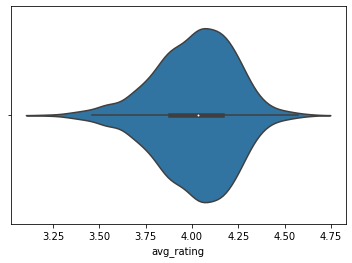

In [185]:
sns.violinplot(x=df8["avg_rating"])
df8['avg_rating'].describe()

count    1067.000000
mean       86.200562
std       166.493601
min         2.000000
25%        11.000000
50%        28.000000
75%        73.000000
max      2154.000000
Name: author_num_unique_books, dtype: float64

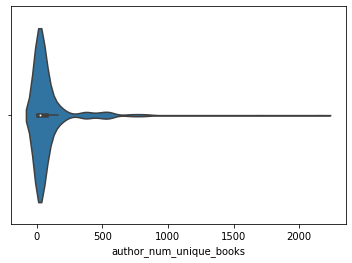

In [186]:
sns.violinplot(x=df8["author_num_unique_books"])
df8['author_num_unique_books'].describe()

In [187]:
df8_1 = df8[df8['author_num_unique_books']<100]
len(df8_1.index)

850

count    850.000000
mean      27.211765
std       23.296569
min        2.000000
25%        8.000000
50%       20.000000
75%       40.000000
max       99.000000
Name: author_num_unique_books, dtype: float64

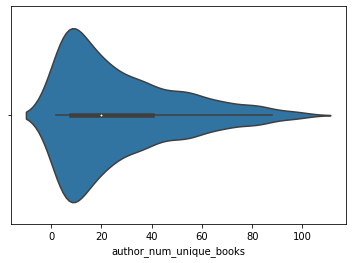

In [188]:
df8 = df8_1.copy()
sns.violinplot(x=df8["author_num_unique_books"])
df8['author_num_unique_books'].describe()

In [189]:
genre_cols = []
for coli in df8.columns:
    if "genre_" in coli: genre_cols.append(coli)
df9 = df8.drop(genre_cols,axis=1)
df9.head()

,avg_rating,book_title,author_num_unique_books,genres_str,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,...,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19,reviews_per_month
10,4.20,The Gifts of Imperfection,53.0,audiobook health inspirational mental-health n...,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,55.458333
11,4.27,Daring Greatly,53.0,audiobook business leadership non-fiction pare...,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.406250
12,3.82,Who Moved My Cheese?,69.0,buisness business inspirational leadership man...,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.746212
14,3.68,"The Secret (The Secret, #1)",55.0,audiobook business inspirational new-age non-f...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,73.982143
15,3.62,The Happiness Project,21.0,adult audiobook biography biography-memoir ins...,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.848485


In [190]:
df9.to_csv('../data/books_25_pages_clean0_description_genres.csv',index=False)